In [1]:
import torch

import utils.config as config
from cnn.vgg import *
from utils.loadData import *
from utils.tools import *

import warnings
warnings.filterwarnings("ignore") 

In [2]:
print(config.num_classes)

10


### 加载模型
### 选择一
使用自定义的vgg16，不加载预训练权重

In [ ]:
# torch.rand 返回一个 [0,1) 之间的均匀分布
x = torch.rand(size=(2,3,227,227))
net = vgg16(init_weights=False,num_classes = config.num_classes,dropout=config.dropout)
net(x).shape[0]

### 选择二
使用 pytorch 官方的 model.vgg16，目的是使用预训练好的权重。

In [3]:
import torchvision.models as models
net = models.vgg16(pretrained=True)
# 修改输出的分类个数
net.classifier[6] = nn.Linear(net.classifier[6].in_features, 10)

In [5]:
net.classifier.parameters()

<generator object Module.parameters at 0x000002014D912DD0>

加载数据集
1. fashion_mnist
2. CIFAR10

In [4]:
# train_iter, test_iter = load_data_fashion_mnist(batch_size=config.batch_size,resize=config.resize)
train_iter, test_iter = load_data_cifar10(batch_size=32,resize=227)

Files already downloaded and verified
Files already downloaded and verified


RTX3080训练

loss 0.055, train acc 0.983, test acc 0.875
225.8 examples/sec on cuda:0


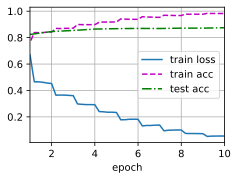

In [5]:
train_ch6_NoneInitWeight(net, train_iter, test_iter, 10, 1e-2, try_gpu())